# Apprentissage Non-Supervisé: KMeans (Clustering) 

In [1]:
# Chargement des bibliothèques
import numpy as np
import matplotlib.pyplot as plt

# KMeans Clustering

In [2]:
# Génération de données p(x,y)qui suit la loi normale 
from sklearn.datasets import make_blobs        
       #  100 observations points, trois cluster, 0.4 l'écart type de la variance
    #X les points de coordonné et y leur la label
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
#y

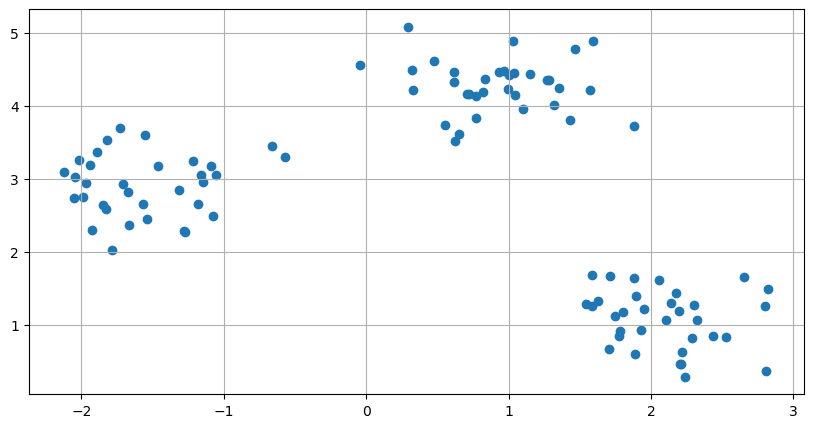

In [3]:
#Afficher les observations
plt.figure(figsize=(10,5))
#nuage des observation avc les deux caracteristiques
plt.scatter(X[:,0], X[:,1])
plt.grid(True)
plt.show()

# Charger la classe KMeans à partir de module cluster de la bibliothèque sklearn, puis créer une instance km de la classe KMeans avec un nombre de clusters = 3

In [4]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

# Entrainer km 

In [5]:
km.fit(X)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

# Prédire les étiquettes des valeurs de données sur la base du modèle formé

In [6]:
km.predict(X)

array([0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2])

# Calculer le score de km

In [7]:
#La somme de la variance inter et intra classe
km.score(X)  # première méthode     
#km.inertia_ # deuxième méthode

-30.870531280140675

# Afficher les coordonnées des clusters

In [8]:
km.cluster_centers_

array([[ 2.08889087,  1.07930405],
       [ 0.92702654,  4.27385438],
       [-1.55022199,  2.90542155]])

# Tracer les trois clusters ainsi que leurs centres

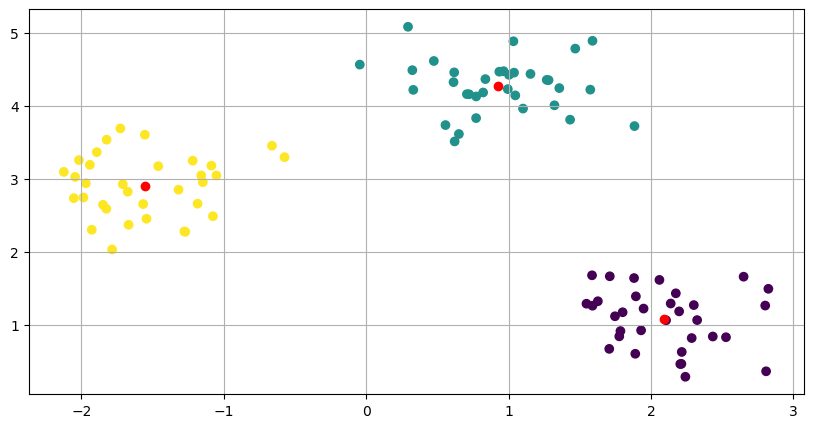

In [9]:
plt.figure(figsize=(10,5))

plt.scatter(X[:,0], X[:,1], c=km.predict(X))

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='r')

plt.grid(True)

# Chercher le nombre optimale des clusters
- On va créer une liste de 24 clusters et on cherche le nombre optimale on utilisant la courbe elbow
- Créer une liste inertia(inertie) qui contient les inertias de Km pour des valeurs de K (nombre de clusters) allant de 1 à 24

In [10]:
inertia = []
K = range(1, 25)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)
    
print(inertia)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

[430.9164124491008, 164.99757155273892, 30.87053128014067, 26.572974757461065, 22.600261190858824, 19.081513957283697, 15.897471735241197, 13.742105711108087, 12.291524758726801, 10.555426651815887, 9.85928651336707, 8.685119587896128, 7.83607198208901, 6.752625538946361, 6.404511749635505, 5.76225955900365, 5.446224669707174, 4.697587366242246, 4.296236004910285, 4.024592827388289, 3.652233866082465, 3.511409978665691, 3.064823579993826, 2.8508660854718335]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Tracer la courbe elbow associée à inertia et K

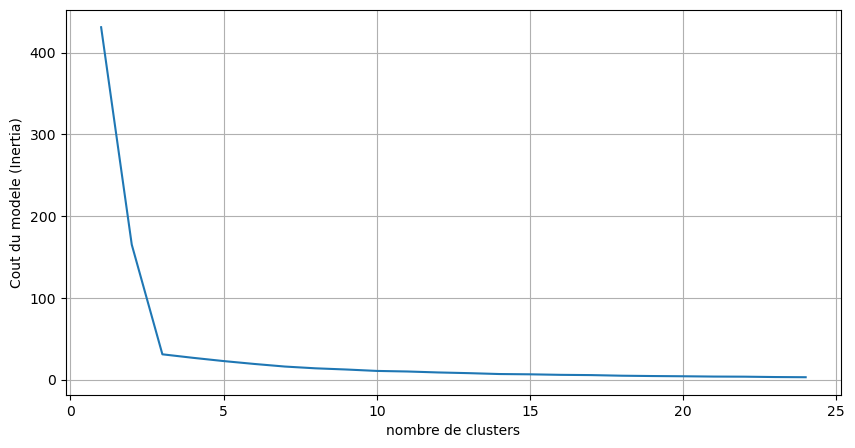

In [11]:
plt.figure(figsize=(10,5))
plt.plot(K, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid(True)